# Classification Assignment

Data Source https://www.kaggle.com/blastchar/telco-customer-churn

Download data from here: https://drive.google.com/file/d/1Fpt4iCGcLWCOay_elL55-oXEF1q0Mkpo/view?usp=sharing

## 1. Basic Pandas Operations

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read the dataset and display the head. You will get the output as mentioned below

df = pd.read_csv(r'C:\Users\user\Documents\offlineclass\sprint2\churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Check the shape of the dataframe

df.shape

(7043, 21)

In [6]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Cleaning the Data

In [7]:
# Observe that all these Object columns have two values - Yes and No

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [8]:
# Converting all the Yes to 1 and No to 0

var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [9]:
# Now again having a look at all those columns to see if everything went well

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [10]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [11]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [12]:
# You can also do this to separate Object columns

df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [13]:
df['TotalCharges'].dtype

dtype('O')

In [14]:
# Converting empty string in TotalCharges to NaN

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [15]:
# TotalCharges should be a float but it is a Object type. Lets try converting it to float64

df['TotalCharges'] = df['TotalCharges'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [16]:
# Lets just try to see what is happening with TotalCharges. Check the output.

df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [17]:
# Observe the output, TotalCharges has 11 Missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [18]:
# Dropping customerID

df = df.drop('customerID', axis=1)

df.shape

(7043, 20)

In [19]:
# Getting all the Object Dtypes

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [20]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df.shape

(7043, 20)

In [22]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [24]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [25]:
df = df.drop(df_categorical.columns, axis=1)

In [26]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

### Outliers

In [28]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


### Missing Values

In [31]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [32]:
df = df[~np.isnan(df['TotalCharges'])]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [34]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [35]:
df['Churn'].value_counts()

# Churn 'Yes' are 1

0    5163
1    1869
Name: Churn, dtype: int64

In [36]:
df1 = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df1.loc[df['Churn'] == 1]
non_fraud_df = df1.loc[df['Churn'] == 0][:1869]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1306,0,0,0,70,1,1,1,1,1,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3050,0,0,0,5,1,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2161,0,0,0,2,1,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5884,1,1,0,46,0,0,1,1,1,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6563,0,1,1,15,1,0,0,0,0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
new_df.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [38]:
features = new_df.columns

In [39]:
new_df.shape

(3738, 25)

In [40]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(new_df)
print(standardized_data.shape)

(3738, 25)


In [41]:
df2 = pd.DataFrame(standardized_data,columns = features)
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.482545,-0.902531,-0.595271,1.719365,0.317854,1.753949,1.438390,1.426216,1.725281,1.218081,...,-1.013467,-0.317854,1.130433,0.954486,-0.450225,2.216880,-0.465189,2.086936,-0.830586,-0.517251
1,-0.482545,-0.902531,-0.595271,-0.960676,0.317854,-0.570142,-0.695222,-0.701156,1.725281,-0.820964,...,-1.013467,-0.317854,-0.884617,0.954486,-0.450225,-0.451084,-0.465189,2.086936,-0.830586,-0.517251
2,-0.482545,-0.902531,-0.595271,-1.084370,0.317854,-0.570142,-0.695222,1.426216,-0.579616,-0.820964,...,-1.013467,-0.317854,-0.884617,0.954486,-0.450225,-0.451084,-0.465189,-0.479171,1.203969,-0.517251
3,2.072346,1.107995,-0.595271,0.729811,-3.146102,-0.570142,1.438390,1.426216,1.725281,1.218081,...,0.986712,3.146102,-0.884617,-1.047685,-0.450225,2.216880,-0.465189,-0.479171,-0.830586,-0.517251
4,-0.482545,1.107995,1.679907,-0.548362,0.317854,-0.570142,-0.695222,-0.701156,-0.579616,-0.820964,...,0.986712,-0.317854,1.130433,0.954486,-0.450225,-0.451084,-0.465189,-0.479171,-0.830586,-0.517251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,2.072346,1.107995,-0.595271,0.358729,0.317854,-0.570142,-0.695222,-0.701156,-0.579616,1.218081,...,0.986712,-0.317854,1.130433,0.954486,-0.450225,-0.451084,-0.465189,-0.479171,1.203969,-0.517251
3734,-0.482545,1.107995,1.679907,-0.672056,0.317854,-0.570142,-0.695222,-0.701156,-0.579616,-0.820964,...,-1.013467,-0.317854,-0.884617,-1.047685,2.221111,-0.451084,-0.465189,-0.479171,-0.830586,1.933298
3735,-0.482545,-0.902531,-0.595271,-0.672056,0.317854,-0.570142,-0.695222,1.426216,-0.579616,1.218081,...,-1.013467,-0.317854,1.130433,0.954486,-0.450225,-0.451084,-0.465189,-0.479171,-0.830586,-0.517251
3736,2.072346,-0.902531,-0.595271,1.142125,0.317854,-0.570142,1.438390,1.426216,1.725281,1.218081,...,-1.013467,-0.317854,1.130433,0.954486,-0.450225,-0.451084,2.149663,-0.479171,-0.830586,-0.517251


In [42]:
x = df2
y =df2.pop('Churn')

In [43]:
# train test spilit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [44]:
print(X_train.shape, y_test.shape)
print( X_train.shape, y_test.shape)

(2990, 24) (748,)
(2990, 24) (748,)


In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = GridSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))

    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)
scoring accuracy
0.7700534759358288
Best parameters set found on train set:
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)
scoring precision
0.7725
Best parameters set found on train set:
{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)
scoring recall
0.7917737789203085


In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=9)
classifier.fit(X_train, y_train)

LogisticRegression(C=9)

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

0.7727272727272727
0.773067331670823
0.771716636472349
0.7848101265822784


In [51]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

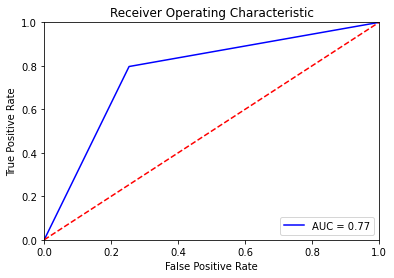

In [52]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[268,  91],
       [ 79, 310]], dtype=int64)

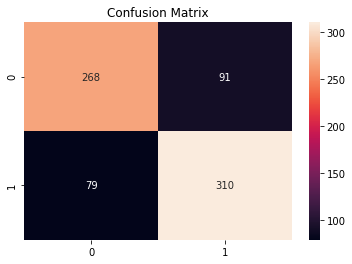

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 2, 'n_neighbors': 10}
KNeighborsClassifier(n_neighbors=10)
scoring accuracy
0.7486631016042781
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=3)
scoring precision
0.7592592592592593
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7, p=1)
scoring recall
0.794344473007712


In [57]:
classifier = KNeighborsClassifier(n_neighbors=9,p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7473262032085561
0.7325581395348837
0.7447171878468468
0.7692307692307692
0.8097686375321337


In [60]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

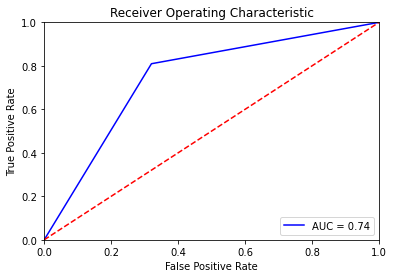

In [61]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [62]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[244, 115],
       [ 74, 315]], dtype=int64)

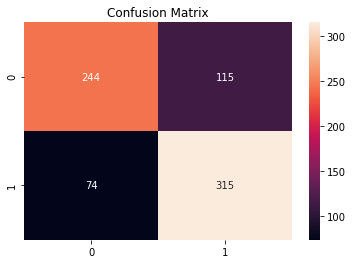

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

decision tree


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tuned_parameters = [{'max_depth':[1, 2, 3, 4, 5,6,7,8,9,10]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)
scoring accuracy
0.766042780748663
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
scoring precision
0.7762803234501348
Best parameters set found on train set:
{'max_depth': 1}
DecisionTreeClassifier(max_depth=1)
scoring recall
0.974293059125964


In [66]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7540106951871658
0.7762803234501348
0.7545810627922463
0.7578947368421053
0.7403598971722365


In [69]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

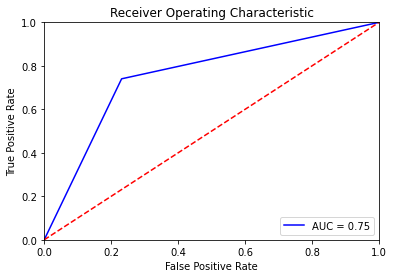

In [70]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[276,  83],
       [101, 288]], dtype=int64)

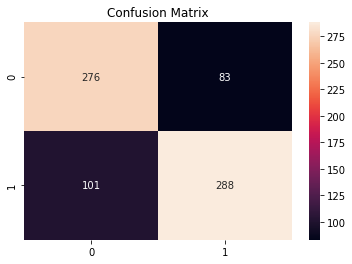

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
tuned_parameters = [{'max_depth':[1, 2, 3, 4, 5,6,7,8,9,10],'n_estimators':[100,200]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        RandomForestClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_estimators': 200, 'max_depth': 4}
RandomForestClassifier(max_depth=4, n_estimators=200)
scoring accuracy
0.7727272727272727
Best parameters set found on train set:
{'n_estimators': 100, 'max_depth': 6}
RandomForestClassifier(max_depth=6)
scoring precision
0.7698019801980198
Best parameters set found on train set:
{'n_estimators': 100, 'max_depth': 6}
RandomForestClassifier(max_depth=6)
scoring recall
0.8046272493573264


In [84]:
classifier = RandomForestClassifier(max_depth=6,n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [85]:
y_pred = classifier.predict(X_test)

In [86]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7633689839572193
0.763681592039801
0.762289564700575
0.7762326169405815
0.7892030848329049


In [87]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

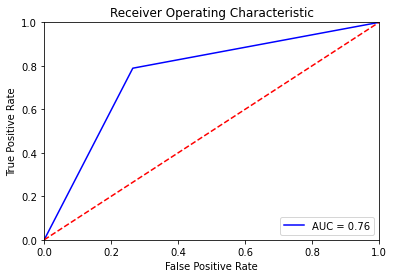

In [88]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[264,  95],
       [ 82, 307]], dtype=int64)

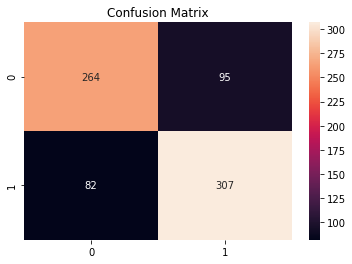

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

SVM

In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [93]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]                                   
clf = RandomizedSearchCV( SVC(), tuned_parameters, scoring='accuracy')

clf.fit(X_train, y_train)
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()
print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.029145187379301385, 'C': 1}
SVC(C=1, gamma=0.029145187379301385)

0.7713903743315508


In [95]:
classifier = SVC(kernel='rbf',C =1,gamma=0.029145187379301385)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.029145187379301385)

In [96]:
y_pred = classifier.predict(X_test)

In [98]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.7713903743315508
0.7698019801980198
0.7702164681957165
0.7843631778058008
0.7994858611825193


In [99]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

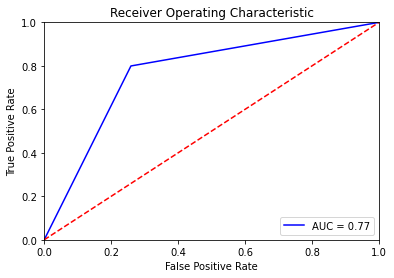

In [100]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[266,  93],
       [ 78, 311]], dtype=int64)

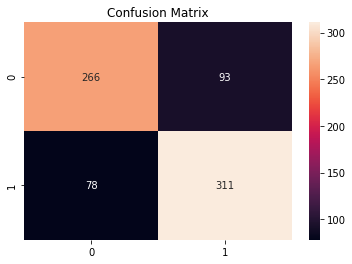

In [102]:
import seaborn as sns

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance